In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot

In [19]:
mlat = np.arange(-89.5,90.,1.)
mlon = np.arange(0.5,360.,0.5)
x, y = np.meshgrid(mlon, mlat)
z = np.sin(np.radians(x)) + np.cos(np.radians(y))
ds = xr.DataArray(z, coords=[mlat, mlon], dims=['lat', 'lon'])
ds

<xarray.DataArray (lat: 180, lon: 719)>
array([[ 1.745307e-02,  2.617894e-02,  3.490348e-02, ..., -1.745041e-02,
        -8.725871e-03,  2.602085e-16],
       [ 3.490348e-02,  4.362935e-02,  5.235390e-02, ..., -4.059253e-16,
         8.724542e-03,  1.745041e-02],
       [ 5.234592e-02,  6.107179e-02,  6.979634e-02, ...,  1.744244e-02,
         2.616698e-02,  3.489285e-02],
       ...,
       [ 5.234592e-02,  6.107179e-02,  6.979634e-02, ...,  1.744244e-02,
         2.616698e-02,  3.489285e-02],
       [ 3.490348e-02,  4.362935e-02,  5.235390e-02, ..., -4.059253e-16,
         8.724542e-03,  1.745041e-02],
       [ 1.745307e-02,  2.617894e-02,  3.490348e-02, ..., -1.745041e-02,
        -8.725871e-03,  2.602085e-16]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float64 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 ...

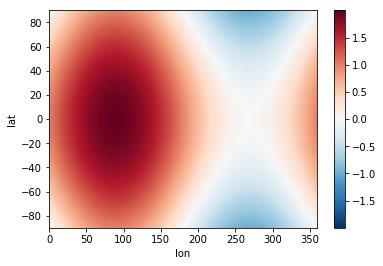

In [20]:
ds.plot()

In [24]:
out = ds.sel(lat=np.arange(60.,90., 0.25), lon=np.arange(0.,360.,0.25), method='nearest')

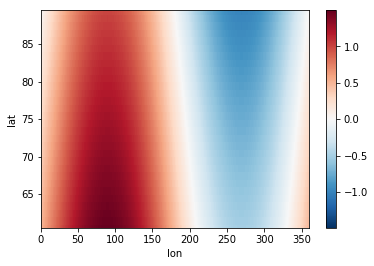

In [25]:
out.plot()

In [62]:
ilon, ilat = np.meshgrid(np.arange(150.,250.,0.333), np.arange(70.,80.,0.33))
ind_ilon = xr.DataArray(ilon.flatten(), dims=['z'])
ind_ilat = xr.DataArray(ilat.flatten(), dims=['z'])

print (ind_ilon)
print (ind_ilat)

#result = ds.sel(lat=ilat.flatten(), lon=ilon.flatten(), method='nearest').values

<xarray.DataArray (z: 9331)>
array([150.   , 150.333, 150.666, ..., 249.234, 249.567, 249.9  ])
Dimensions without coordinates: z
<xarray.DataArray (z: 9331)>
array([70. , 70. , 70. , ..., 79.9, 79.9, 79.9])
Dimensions without coordinates: z


In [67]:
result = ds.sel(lon=ind_ilon, lat=ind_ilat, method='nearest').values.reshape(ilon.shape)

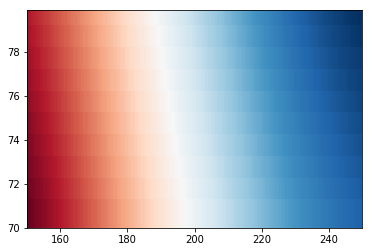

In [70]:
plt.pcolormesh(ilon, ilat, result, cmap='RdBu_r')

## From the XArray documents

In [60]:
da = xr.DataArray(np.arange(56).reshape((7, 8)), dims=['x', 'y'])
da

<xarray.DataArray (x: 7, y: 8)>
array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55]])
Dimensions without coordinates: x, y

In [61]:
da.isel(x=xr.DataArray([0, 1, 6], dims='z'), y=xr.DataArray([0, 1, 0], dims='z'))

<xarray.DataArray (z: 3)>
array([ 0,  9, 48])
Dimensions without coordinates: z